# Perceptron  ( Classification )

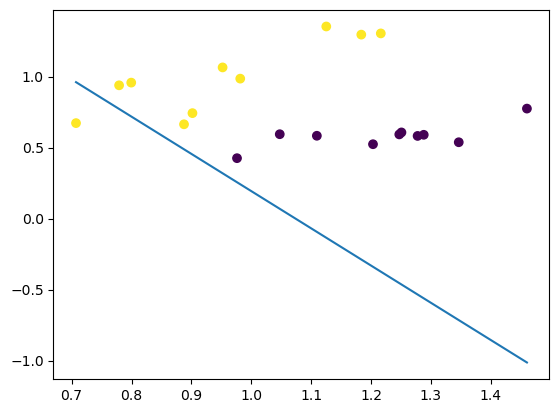

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(22)

# Number of the points per class
N = 10

X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X2_1 = X1_1 + np.random.normal(loc=0, scale=0.15, size=N)
Y1 = np.ones(N)

X1_2 = 2 * np.random.normal(loc=0.6, scale=0.07, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N)
Y2 = -np.ones(N)

X1 = np.concatenate((X1_1,X1_2))
X2 = np.concatenate((X2_1,X2_2))
Y = np.concatenate((Y1,Y2))

X0 = np.ones(N * 2)
X = np.stack((X0,X1,X2),axis=1)

# Initilize the Weights
w = np.random.uniform(low=-1,size=3)

plt.scatter(X[:,1],X[:,2],c=Y)
plt.plot([np.min(X1_1),np.max(X1_2)],[np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]])

In [2]:
# Defining Sum Squared Error
def error_sse(errors):
    return np.sum(np.square(errors)) / 2

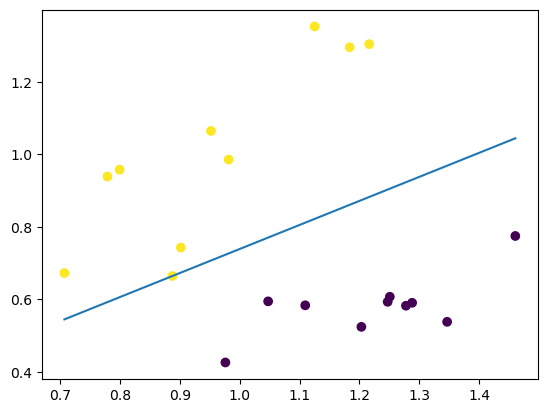

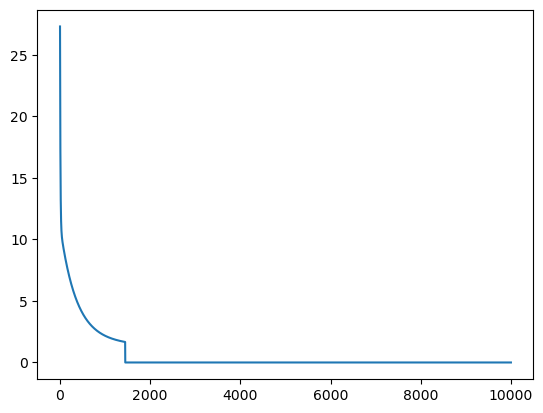

In [3]:
# Initilizing Weights again, and defining epochs, eta, and errors
w = np.random.uniform(low=-1,size=3)
w_init = w
eta = 0.01
epochs = 0
max_epochs = 10000
total_error = np.zeros(max_epochs)

while ( epochs < max_epochs ):    
    adaline_output = np.dot(X,w)
    errors = Y - adaline_output
    
    total_error[epochs] = ( np.sum(np.square(errors)) / 2 )
    
    if (all(adaline_output * Y > 0)):
        break
    else:
        w_delta = eta * 2 * np.dot(X.T,errors) / X.shape[0]
        w += w_delta
    
    epochs = epochs + 1

plt.scatter(X[:,1],X[:,2],c=Y)
plt.plot([np.min(X1_1),np.max(X1_2)],[np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]])
plt.figure()
plt.plot(range(max_epochs), total_error)

## Stochastic Gradient Descent

Numer of epochs to reach the best solutions:  38


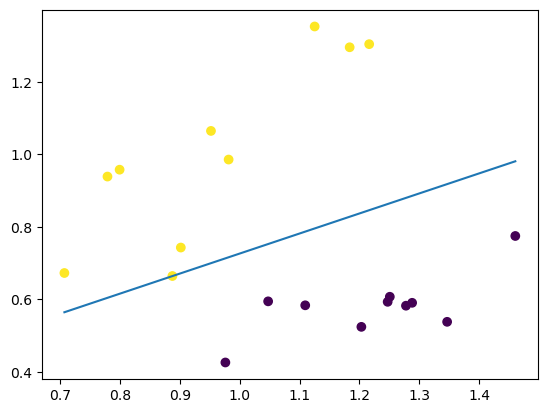

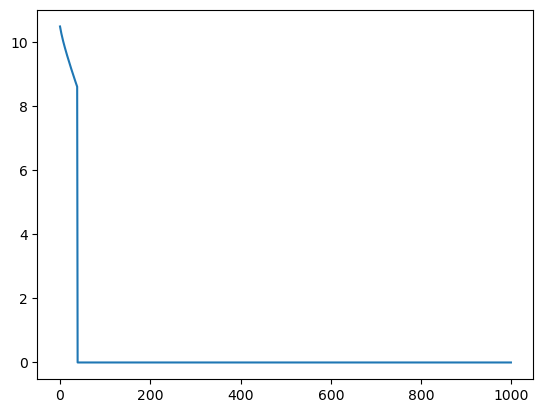

In [206]:
np.random.seed(43)

# generate w_0,....,w_n
w = np.random.uniform(low=-0.1, high=0.1, size=3)
#w = np.zeros(3)

# set learning rate 0 < eta < 1
eta = 0.001

# check epochs
epochs = 0

# set maximum epochs
max_epochs = 1000

# track total error per epoch
total_error = np.zeros(max_epochs)

while (epochs < max_epochs):
    
    #w = w / np.linalg.norm(w)
    adaline_output = np.dot(X,w)
    
    errors = Y - adaline_output
    
    total_error[epochs] = ( np.sum(np.square(errors)) / 2 )
    
    if( all(adaline_output * Y > 0)):
        break
    else:
        rand_perm = np.random.permutation(range(Y.shape[0]))
        
        for xi, yi in zip(X[rand_perm,:],Y[rand_perm]):
            error = yi - np.dot(xi,w)
            w_delta = eta * 2 * xi * error
            w += w_delta
            
    epochs += 1

plt.scatter(X[:,1],X[:,2],c=Y)
plt.plot([np.min(X1_1),np.max(X1_2)],[np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]])
plt.figure()
print("Numer of epochs to reach the best solutions: ", epochs)
plt.plot(range(max_epochs), total_error)

## Mini-batch stochastic gradient descent


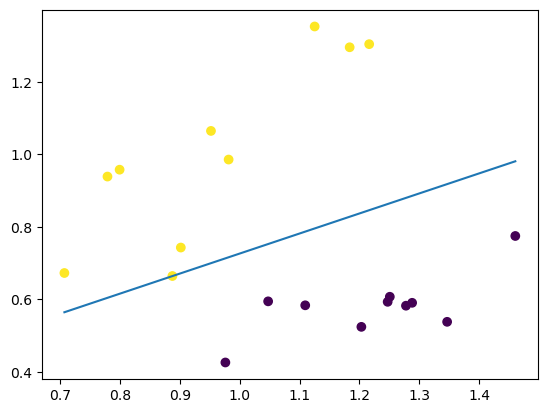

In [207]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(22)

# Number of the points per class
N = 10

X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X2_1 = X1_1 + np.random.normal(loc=0, scale=0.15, size=N)
Y1 = np.ones(N)

X1_2 = 2 * np.random.normal(loc=0.6, scale=0.07, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N)
Y2 = -np.ones(N)

X1 = np.concatenate((X1_1,X1_2))
X2 = np.concatenate((X2_1,X2_2))
Y = np.concatenate((Y1,Y2))

X0 = np.ones(N * 2)
X = np.stack((X0,X1,X2),axis=1)

# Initilize the Weights

plt.scatter(X[:,1],X[:,2],c=Y)
plt.plot([np.min(X1_1),np.max(X1_2)],[np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]])

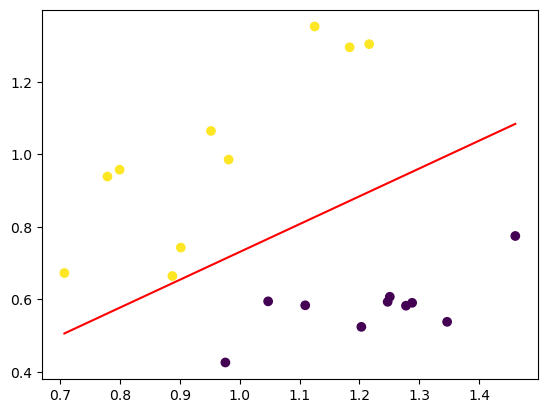

In [249]:
w = np.random.uniform(low=-1, high=1, size=3)

epochs = 0
eta = 1e-2
max_epochs = 100
batch_size = 10

total_error = np.zeros(max_epochs + 1)
count_error = np.zeros(max_epochs + 1)

for epochs in range(max_epochs):
    
    total_error[epochs] = np.sum(np.square(y - np.dot(X,w)))
    count_error[epochs] = np.sum(y * np.sign(np.dot(X,w)) < 0)
    
    rand_perm = np.random.permutation(range(y.shape[0]))
    X_perm = X[rand_perm,:]
    y_perm = y[rand_perm]

    for j in range(0, y.shape[0], batch_size):
        X_batch = X_new[j : j + batch_size, :]
        y_batch = y_new[j : j + batch_size]
        
        errors = y_batch - np.dot(X_batch, w)
        w = w + eta * np.dot(X_batch.T, errors)
    
total_error[epochs] = np.sum(np.square(y - np.dot(X,w)))
count_error[epochs] = np.sum(y * np.sign(np.dot(X,w)) < 0)


plt.scatter(X[:,1],X[:,2],c=Y)
plt.plot([np.min(X[:, 1]), np.max(X[:, 1])], [np.min(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2], np.max(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2]],
            c = "red")

## Plot number of errors per epoch

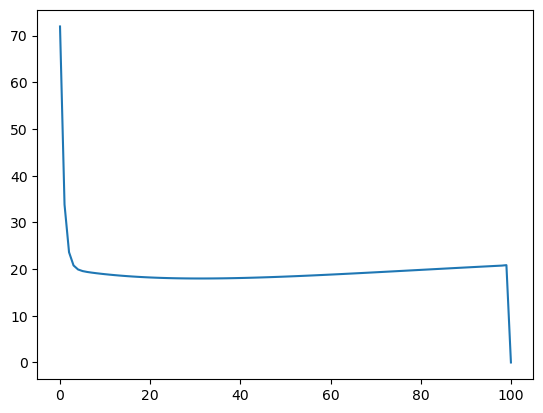

In [251]:
plt.plot(range(max_epochs+1),total_error)

# Logistic Regression ( Classification )

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


In [ ]:
def sigmoid(z)
    return 1.0 / ( 1.0 + no.exp(-z))

In [ ]:
# write your answer here
# generate w_0,....,w_n
np.random.seed(223)

w = np.random.randn(2)

# set learning rate 
eta = 1e-3

# set mini-batch size
batch_size = 20

# set max epochs
max_epochs = 1000

# set errors per epoch
errors_epoch = np.zeros(max_epochs)

# start training
for epochs in range(max_epochs):
    
    # output
    linreg_output = sigmoid(np.dot(X, w))

    # compute quantity of loss
    cost = (-y.dot(np.log(linreg_output)) - ((1 - y).dot(np.log(1 - linreg_output))))

    errors_epoch[epochs] = cost
    
    # compute (quantity) of error
    errors = (y - linreg_output)
    
    # generate random permutation for stochastic gradient descent
    rand_perm = np.random.permutation(range(y.shape[0]))
    X = X[rand_perm, :]
    y = y[rand_perm]
    
    # mini-batch learning
    for j in range(0, y.shape[0], batch_size):
        
        X_batch = X[j:(j + batch_size), :]
        
        y_batch = y[j:(j + batch_size)]
        
        # output
        linreg_output = sigmoid(np.dot(X_batch, w))
        
        errors = (y_batch - linreg_output)
        
        w = w + eta * np.dot(X_batch.T, errors)    
x
print(w)
print(errors_epochs[0:20])

# Linear Regression

## Linear Regression ( Degree = 1)

In [ ]:
w = np.dot(np.linalg.inv(np.dot(X.T,T), np.dot(X.T,Y)))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.linear_model as LinearRegression

# Number of the points
N = 20

# Coefficent
coeff = 5

# Defining Varibles
X = coeff * np.random.rand(N)
Y = 1.2 * X + 1 + 0.8 * np.random.rand(N)

# Defining X0
X0 = np.ones(N)

# Adding X0 to the X1
X_ = np.stack((X0,X), axis=1)

X_.shape

(20, 2)

In [2]:
# Training the data, and finding the best weights using linear regression
w = np.dot(np.linalg.inv(np.dot(X_.T,X_)),np.dot(X_.T,Y))

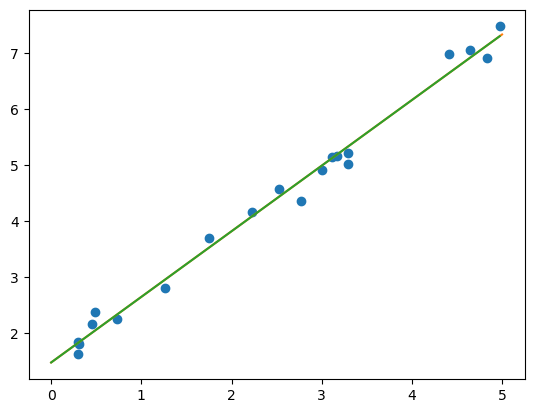

In [3]:
plt.plot(X,Y,'o')
plt.plot([0, coeff], [w[0], coeff * w[1] + w[0]])
plt.plot([0, X.max()],[w[0], X.max() * w[1] + w[0]])

## Polynomial Regression 

In [315]:
from sklearn.metrics import mean_squared_error, r2_score

1.2126229239623536

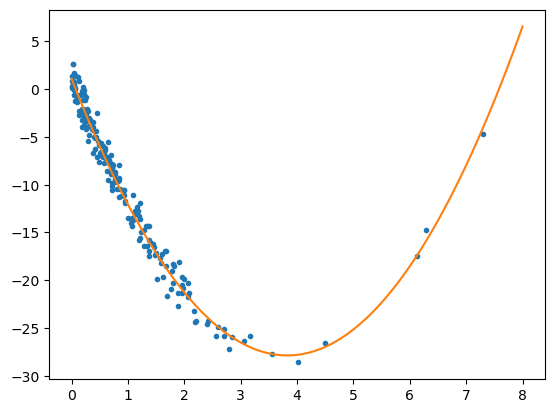

In [313]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of points and seed default
np.random.seed(22)
N = 200

X = np.random.exponential(scale=1.0, size=N)
y = 2 * X**2 + -15.2 * X + 1 + np.random.randn(N)

# Adding X0 to the points
X0 = np.ones(N)
X_n = np.stack((X0,X,X**2),axis=1)

# Plotting the points
plt.plot(X,y,'.')

# Training the w
w = np.dot(np.linalg.inv(np.dot(X_n.T,X_n)),np.dot(X_n.T,y))

# Creating a x_grid
x_grid = np.linspace(0,8,100)

# Plotting the fitted line
plt.plot(x_grid, w[0] + w[1] * x_grid + w[2] * x_grid**2)

from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y, np.dot(X_n,w))

#######
# It seems like it's over-fitted #
#######

### Compare closed form solutions (with different packages)

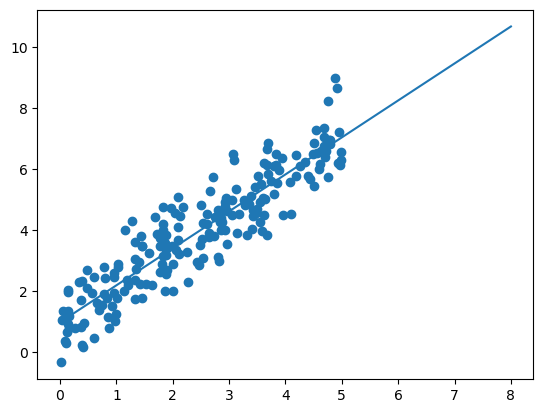

In [301]:
# Generating the points
X = 5 * np.random.rand(200,1)
y = 1.2 * X + 1 + 0.8 * np.random.randn(200,1)

from sklearn.linear_model import LinearRegression



In [310]:
# Importing the required packaged
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Generating the points
X = 5 * np.random.rand(200,1)
y = 1.2 * X + 1 + 0.8 * np.random.randn(200,1)

X_ = sm.add_constant(X)

# Find the closed form solution
# Matrix Formulation
w = np.dot(np.linalg.inv(np.dot(X_.T,X_)),np.dot(X_.T,y))

print(f'Matrix formulation fitted weights are {w.T}.')

# StatsModel Library
sm_model = sm.OLS(y, X_)
model = sm_model.fit()

print(f'The model params is {model.params}.')

# Sklearn LinearRegression Model
sk_model = LinearRegression(fit_intercept=True)
sk_model.fit(X,y)

print(f'The skLearn model params is {sk_model.intercept_} {sk_model.coef_}')

Matrix formulation fitted weights are [[0.95813423 1.24332446]].
The model params is [0.95813423 1.24332446].
The skLearn model params is [0.95813423] [[1.24332446]]


In [ ]:
x_grid = np.linspace(np.min(X), np.max(X), 100)

plt.plot(X,y,'o')
plt.plot(x_grid, w[0] + x_grid * w[1])

# Linear Regression Problem ( Using Libraries )

## How to make continous y-target column binned for stratify

In [ ]:
y_q1, y_q2 = y.quantile([0.25,0.75])

y_IQR = y_q2 - y_q1
band_width = 2 * y_IQR / math.pow(y.shape[0],1/3)
bins_count = int((y.max()-y.min())//band_width)

bins = np.linspace(0,y.shape[0], bins_count)
y_binned = np.digitize(y,bins)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=y_binned)

## Feature Scaling: Why/When

-  <span style="color: red">**REMEMBER:**</span> Not every learning models are sensitive to different feature scales! 

-  For example, in the case of Linear Regression the vector of model parameters we come up with when we minimize the MSE - using either the pseudo-inverse (closed-form) or gradient descent (iterative) solution - is **not** affected by different feature scales, except for a constant.

-  You can convince yourself of this by computing the gradient of MSE using non-scaled and scaled features.

-  Other models, instead, are not invariant with respect to scalar transformations of the input (features), and leads to completely different results if features are not properly scaled. ( SVM ) 

In [ ]:
from sklearn import preprocessing

In [ ]:
# Standardizing features using z-score
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scaler.transform(X_train)

# Normalizing features using min-max
minmax_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = minmax_scaler.transform(X_train)

## Feature Selection

In [ ]:
corr_matrix = data.corr()
coll = corr_matrix[(corr_matrix['mpg'].abs() > .5) & (corr_matrix['mpg'] != 1)].loc[:, 'mpg'].index.tolist()

In [ ]:
X_train_reduced = X_train.loc[:,coll]
X_test_reduced = X_test.loc[:,coll]

## Evaluating Scores

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(true_values, predicted_values)
r2_score(true_values, predicted_values)

In [ ]:
"""
R2 score suffers from an intrinsic issue:
It automatically and spuriously increases when extra explanatory variables are added to the model.
To overcome this problem, 'adjusted R2' is used, instead.

adj_R2 = R2 - (1 - R2) * (p - 1)/(n - p)

where p is the total number of explanatory variables in the model (not including the constant term), 
and n is the sample size.
"""

def adjusted_r2_score(r2, p, n):
    return r2 - (1 - r2) * (p - 1)/(n - p)

## Fitting Model & Predicting

### Validation Set

In [ ]:
from sklearn import linear_model

# Create linear regression object
model = linear_model.LinearRegression()

# 1. Try to fit this linear regressor to our original training set
model.fit(X_train, y_train)

# 2. Assess the quality of predictions made on the same training set
print("***** Evaluate Predictions on Training Set *****")

mpg_y_train_pred = model.predict(X_train)
evaluate(y_train, mpg_y_train_pred)
plot_true_vs_predicted(y_train, mpg_y_train_pred)

In [ ]:
# Running another Regression on STD and MINMAX
model_std = linear_model.LinearRegression()

# 1. Try to fit this linear regressor to our original training set
model_std.fit(X_train_std, y_train)

# 2. Scale the test set (using the same scaler fit to the training set)
X_test_std = std_scaler.transform(X_test)

# 3. Make predictions using the testing set
mpg_y_pred_std = model_std.predict(X_test_std)

# 4. Evaluate predictions
evaluate(y_test, mpg_y_pred_std)

In [ ]:
# Create another linear regression object
model_minmax = linear_model.LinearRegression()

# 1. Try to fit this linear regressor to our original training set
model_minmax(X_train_minmax, y_train)

# 2. Scale the test set (using the same scaler fit to the training set)
X_test_minmax = minmax_scaler.transform(X_test)

# 3. Make predictions using the testing set
mpg_y_pred_minmax = model_minmax.predict(X_test_minmax)

# 4. Evaluate predictions
evaluate(y_test, mpg_y_pred_minmax)

# 5. Plot true vs. predicted values of 'mpg'
plot_true_vs_predicted(y_test, mpg_y_pred_minmax)

### Cross-Validation

In [320]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = linear_model.LinearRegression()

cv_scores = cross_validate(model, X, y, scoring=['r2'], cv=KFold(n_splits=10,
                                                shuffle=True,
                                                random_state=42),
                                                return_train_score=True)

In [ ]:
cv_predict = cross_val_predict(model, X, y, cv=KFold(n_splits=10,
                                                shuffle=True,
                                                random_state=42))

plt.plot(y, cv_predict,'.')
plt.plot([y.min(),y.max()],[y.min(), y.max()])

In [4]:
# Data shuffling before data splitting
cv_scores_shuffle = cross_val_score(model, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=42))

# Getting a dictionary of scores.
cv_scores_dict = cross_validate(model, X, y, scoring=['r2'], cv=KFold(n_splits=10, 
                                                                    shuffle=True,
                                                                    random_state=42), return_train_score=True)

# Predicting values using the KFold Cross Validation
cv_pred = cross_val_predict(model, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=42))

# Leave-One-Out cross validation (i.e., k = n, number of observations)
cv_one_out_pred = cross_val_predict(model, X, y, cv=X.shape[0])

NameError: name 'cross_val_score' is not defined

# Logistic Regression & Decision Tree Classifier ( Using Libraries )

### First by Splitting the Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
 
lr = LogisticRegression(max_iter = 10)
dt = DecisionTreeClassifier(max_depth = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)

s1 = lr.score(x_test, y_test)
s2 = dt.score(x_test, y_test)

### Using All Data ( Cross-Validation )
- How To Use KFold, and Gather Results, Plot the Performances
- Best Version of KFold to be used in exam

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


# Map the categorical class labels to numeric classes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## KFold best version to use in exam
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=37)
cv_lr = cross_validate(lr, x, y_encoded, cv = k_fold, scoring = ('roc_auc', 'accuracy', 'f1_macro'), return_train_score=True)
cv_dt = cross_validate(dt, x, y_encoded, cv = k_fold, scoring = ('roc_auc', 'accuracy', 'f1_macro'), return_train_score=True)


# Writing down all the performances for all splits
perf = pd.DataFrame({
  'Model': ['LR'] * 10 + ['DT'] * 10,
  'Performance': list(cv_lr['test_f1_macro']) + list(cv_dt['test_f1_macro'])
})


# Wilcoxon best syntax for using in the exam
# Using Wilcoxon to check how performance of those are related

from scipy.stats import wilcoxon

# perform Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_pval = wilcoxon(perf[perf['Model'] == 'LR']['Performance'], 
                                        perf[perf['Model'] == 'DT']['Performance'], 
                                        alternative = 'two-sided', 
                                        zero_method = 'zsplit', 
                                        correction=False,
                                       mode = 'approx')

# Boxplotting the results
sns.boxplot(data=perf, x='Model', y='Performance')
sns.stripplot(data=perf, x='Model', y='Performance', color='black', size=5)

NameError: name 'y' is not defined

### Other ways to assess the results

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

accuracy_score(true_values, predicted_values)
roc_auc_score(true_values, predicted_values)
classification_report(y_test, predicted_values)

# Two Methods to Find Best Model and Parameters

## Select Best Hyperparameters of a Fixed Family of Models

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
models_and_hyperparams = {'LogisticRegression': (LogisticRegression(solver = "liblinear"),
                                                 {'C': [0.01, 0.05, 0.1, 0.5, 1, 2],
                                                 'penalty': ['l1', 'l2']}
                                                )
                         }

In [ ]:
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=31)

# Get the only model available
model = models_and_hyperparams['LogisticRegression'][0]

# Get the hyperparameters for that model
hyperparams = models_and_hyperparams['LogisticRegression'][1]

gs = GridSearchCV(estimator=model, param_grid=hyperparams, cv=k_fold, 
                  scoring='accuracy',
                  verbose=True,
                 return_train_score=True)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_)

## Select Best Model out of a Set of Family of Models with Fixed Hyperparameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=73, 
                                                    stratify=y)
models = {'LogisticRegression': LogisticRegression(), #solver = "liblinear", max_iter=1000),
          'LinearSVC': LinearSVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier()
          # Add other families of models here...
          # Remember to add other families of models
          # Like KNN ( KNeighborsClassifier )
         }

In [ ]:
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = {}
for model_name, model in models.items():
    cv_scores[model_name] = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')

In [ ]:
cv_df = pd.DataFrame(cv_scores).transpose()
cv_df

# K-Neighbor Algorithms

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   shuffle=True,
                                                   stratify=y,
                                                   random_state=43)

model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)
val_pred = model.predict(X_test)

accuracy_score(y_test, val_pred)

In [ ]:
model_cross = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(model_cross,X,y, cv=5)